In [2]:
%load_ext autoreload
%autoreload 2
import deepfly
from deepfly.CameraNetwork import CameraNetwork
import logging
import matplotlib.pyplot as plt
logging.getLogger().setLevel(logging.DEBUG)

In [35]:
!ls /mnt/lab_server/AYMANNS_Florian/Experimental_data/210414_CI9xG23/Fly1/

001_coronal  006_coronal  011_coronal  crop_parameters.csv
002_coronal  007_coronal  012_coronal  dFF_baseline_denoised.tif
003_coronal  008_coronal  013_coronal  models_green_denoising
004_coronal  009_coronal  014_coronal  ref_frame.tif
005_coronal  010_coronal  015_coronal


In [14]:
image_folder = '/mnt/lab_server/AYMANNS_Florian/Experimental_data/210414_CI9xG23/Fly1/002_coronal/behData/images/'
camNet = CameraNetwork(image_folder=image_folder, output_folder=image_folder + 'df3d')

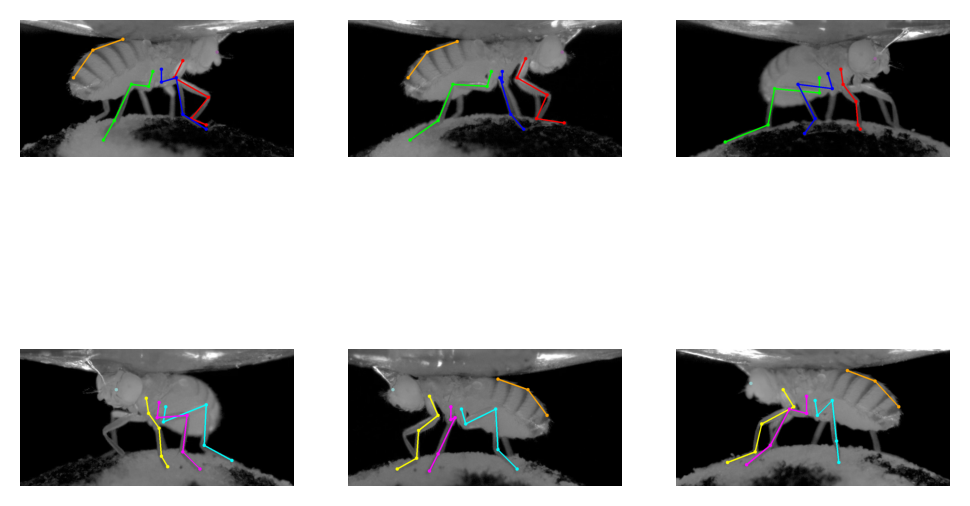

In [15]:
import numpy as np
fig, axs = plt.subplots(2,3, dpi=200)
axs = np.array(axs).flatten()
for idx, i in enumerate([0,1,2,4,5,6]):
    axs[idx].axis('off')
    axs[idx].imshow(camNet[i].plot_2d(600))

In [5]:
#%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
from deepfly.plot_util import normalize_pose_3d, plot_drosophila_3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pose_result_folder = '/mnt/lab_server/HERMANS_Laura/Experimental_data/_behavior/201217_J1M5_rem_1211/Fly8/vol/behData_001/images/df3d/pose_result__mnt_lab_server_HERMANS_Laura_Experimental_data__behavior_201217_J1M5_rem_1211_Fly8_vol_behData_001_images.pkl'
points3d = pickle.load(open(pose_result_folder, 'rb'))["points3d_wo_procrustes"]

pts3d = normalize_pose_3d(points3d, rotate=True)
plot_drosophila_3d(ax, pts3d[0], 1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …